In [1]:
!pip install flask
!pip install pyserial
!jupyter nbconvert --to script functions.ipynb
!pip install nbimporter

[NbConvertApp] Converting notebook functions.ipynb to script
[NbConvertApp] Writing 5326 bytes to functions.py


In [ ]:
from flask import Flask
import serial
import threading
import subprocess
import nbimporter
from functions import detect_objects, crop_book, text_detection, text_correction

app = Flask(__name__)

# 연결할 시리얼 포트와 baudrate 설정
ser = serial.Serial('COM3', 9600)

# 인식된 텍스트를 저장할 전역 변수
recognized_texts_global = []
current_text_index = 0

def read_from_port(ser):
    while True:
        reading = ser.readline().decode().strip()  # 끝의 줄바꿈 제거
        print("Received from Arduino:", reading)
        if reading == "Take Picture":
            take_picture()
        elif reading == "Next":
            next_text()
        elif reading == "Previous":
            previous_text()
        else:
            print("Received from Arduino:", reading)

def take_picture():
    global recognized_texts_global  # 전역 변수 사용을 위한 선언
    global current_text_index  # 현재 텍스트 인덱스 초기화
    print("Taking picture...")
    img_path = "C:\\Users\\peter\\capstone\\camera\\test10.jpg"
    crop_book(img_path)
    img_left = "C:\\Users\\peter\\capstone\\onePage\\left_half.jpg"
    img_right = "C:\\Users\\peter\\capstone\\onePage\\right_half.jpg"
    # 텍스트 인식
    recognized_texts = text_detection(img_left, img_right)
    print(recognized_texts)
    # 텍스트 띄어쓰기 및 오타 교정
    corrected_texts = text_correction(recognized_texts)
    print(corrected_texts)
    # 공백이 아니고, 글자가 있는 요소만 필터링
    filtered_texts = [text for text in corrected_texts if text.strip()]
    print(filtered_texts)
    # 필터링된 텍스트를 전역 변수에 저장
    recognized_texts_global = filtered_texts  # 새로운 텍스트로 업데이트
    current_text_index = 0  # 새로운 텍스트 리스트로 업데이트되면 인덱스 초기화
    
def next_text():
    global current_text_index
    if current_text_index < len(recognized_texts_global) - 1:
        current_text_index += 1
        send_text_to_arduino(recognized_texts_global[current_text_index])
    else:
        print("End of the list\n")

def previous_text():
    global current_text_index
    if current_text_index > 0:
        current_text_index -= 1
        send_text_to_arduino(recognized_texts_global[current_text_index])
    else:
        print("Beginning of the list\n")

def send_text_to_arduino(text):
    print("Sending to Arduino:", text)
    ser.write((text + "\n").encode())
    print("\n")
    
@app.route('/')
def index():
    return "Serial Communication with Arduino"

thread = threading.Thread(target=read_from_port, args=(ser,))
thread.start()

if __name__ == '__main__':
    app.run(debug=False, host='0.0.0.0', port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.0.27:5000
Press CTRL+C to quit


Received from Arduino: Next
End of the list

Received from Arduino: Previous
Beginning of the list

Received from Arduino: Take Picture
Taking picture...


Using cache found in C:\Users\peter/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-5-1 Python-3.12.2 torch-2.2.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Using CPU. Note: This module is much faster with a GPU.


['a', 'ball offire; no, Edward realized,', 'watch that Abilene held in her hanc', 'high; and it was reflecting the light', 'watch; he thought', 'And then Abilene disappear', 'rabbit hit the water with such tre', 'hat blew off his head.', "'", 'That answers that question,', 'watched the hat dance away on th', 'And then he began to sink.', 'He sank and sank and sank', 'the whole time. Not because he', 'he had', 'no choice. His', 'blue water', 'turning to', 'and', 'watched as it', 'finally became as b', 'Edward went down and dow', 'am', 'going to drown; certainly I wo', 'Far above him; the ocean lin', 'it; sailed blithely on; and the ch', 'on the ocean floor; face down;', 'in the muck, he', 'experienced h', 'emotion.', 'Edward Tulane was afraid.', 'ocean liner 원양 정기선.', 'Six', 'pocket', 'My', 'Painted', 'green', 'Chapter', 'it was his', 'pocket', '[; she was', 'it up', 'of the sun.', 'I need that.', 'ed from view and the', 'mendous force that his', "'", 'thought Edward', 'as he', 'e wind.

Exception in thread Thread-33 (read_from_port):
Traceback (most recent call last):
  File "C:\Users\peter\anaconda3\envs\capstone\Lib\threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "C:\Users\peter\anaconda3\envs\capstone\Lib\threading.py", line 1010, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\peter\AppData\Local\Temp\ipykernel_9572\4167829149.py", line 19, in read_from_port
  File "C:\Users\peter\anaconda3\envs\capstone\Lib\site-packages\serial\serialwin32.py", line 275, in read
    raise SerialException("ClearCommError failed ({!r})".format(ctypes.WinError()))
serial.serialutil.SerialException: ClearCommError failed (PermissionError(13, '장치가 명령을 인식하지 않습니다.', None, 22))


['a', 'ball of fire no toward realized', 'watch that abalone held in her can c', 'high and it was reflecting the light', 'watch he thought', 'And then abalone disappear', 'rabbit hit the water with such the', 'hat blew off his head', "'", 'That answers that question', 'watched the hat dance away on the', 'And then he began to sink', 'He sank and sank and sank', 'the whole time Not because he', 'he had', 'no choice His', 'blue water', 'turning to', 'and', 'watched as it', 'finally became as b', 'toward went down and dow', 'am', 'going to drown certainly I wo', 'Far above him the ocean in', 'it sailed blithely on and the oh', 'on the ocean floor face down', 'in the muck he', 'experienced h', 'emotion', 'toward plane was afraid', 'ocean liner', 'Six', 'pocket', 'My', 'Painted', 'green', 'Chapter', 'it was his', 'pocket', 'she was', 'it up', 'of the sun', 'I need that', 'end from view and the', 'men does force that his', "'", 'thought toward', 'as he', 'e wind', '', 'He', 'his eyes open', 

Exception in thread Thread-34 (read_from_port):
Traceback (most recent call last):
  File "C:\Users\peter\anaconda3\envs\capstone\Lib\threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "C:\Users\peter\anaconda3\envs\capstone\Lib\threading.py", line 1010, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\peter\AppData\Local\Temp\ipykernel_9572\4167829149.py", line 19, in read_from_port
  File "C:\Users\peter\anaconda3\envs\capstone\Lib\site-packages\serial\serialwin32.py", line 275, in read
    raise SerialException("ClearCommError failed ({!r})".format(ctypes.WinError()))
serial.serialutil.SerialException: ClearCommError failed (PermissionError(13, '장치가 명령을 인식하지 않습니다.', None, 22))


Received from Arduino: 
Received from Arduino: 


In [1]:
!pip install flask
!pip install pyserial
!pip install opencv-python
!pip install nbimporter
!pip install torch torchaudio torchvision
!jupyter nbconvert --to script text_processing.ipynb
!jupyter nbconvert --to script image_processing.ipynb
!jupyter nbconvert --to script camera_operation.ipynb
!jupyter nbconvert --to script braille_translate.ipynb

[NbConvertApp] Converting notebook text_processing.ipynb to script
[NbConvertApp] Writing 7344 bytes to text_processing.py
[NbConvertApp] Converting notebook image_processing.ipynb to script
[NbConvertApp] Writing 2862 bytes to image_processing.py
[NbConvertApp] Converting notebook camera_operation.ipynb to script
[NbConvertApp] Writing 675 bytes to camera_operation.py
[NbConvertApp] Converting notebook braille_translate.ipynb to script
[NbConvertApp] Writing 6570 bytes to braille_translate.py


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.0.18:5000
Press CTRL+C to quit


=============== Received from Arduino ->  Take Picture ===============
< 1 - 이미지 촬영 >

이미지 촬영 진행 중입니다.


Using CPU. Note: This module is much faster with a GPU.


이미지 촬영이 완료되었습니다.

이미지 경로 : C:\Users\peter\capstone\camera\20240531-202434.jpg

이미지 내 텍스트 인식을 진행 중입니다...
이미지 내 텍스트 인식을 완료했습니다.


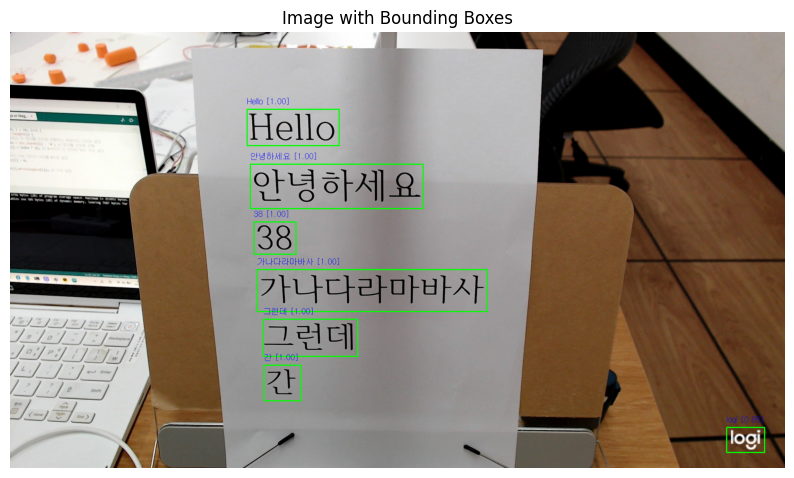

이미지 내 텍스트 라벨링을 완료했습니다.
텍스트 철자 및 문법 교정을 진행 중입니다...
철자 및 문법 교정을 완료했습니다.
인식된 텍스트 :  ['Hello', '38', 'log']
< 4 - 텍스트 점자로 변환 >
텍스트를 점자로 변환 중입니다...
점자 변환이 완료됐습니다.
점자 텍스트 :  ['3603421270705226', '371142', '3670524426']
=============== Received from Arduino ->  Next ===============
Sending to Arduino: 3603421270705226


=============== Received from Arduino ->  Next ===============
Sending to Arduino: 371142


=============== Received from Arduino ->  Next ===============

리스트의 끝점입니다.
=============== Received from Arduino ->  Previous ===============
Sending to Arduino: 3670524426


=============== Received from Arduino ->  Next ===============
Sending to Arduino: 371142


=============== Received from Arduino ->  Take Picture ===============
< 1 - 이미지 촬영 >

이미지 촬영 진행 중입니다.


Using CPU. Note: This module is much faster with a GPU.


이미지 촬영이 완료되었습니다.

이미지 경로 : C:\Users\peter\capstone\camera\20240531-202729.jpg

이미지 내 텍스트 인식을 진행 중입니다...
이미지 내 텍스트 인식을 완료했습니다.


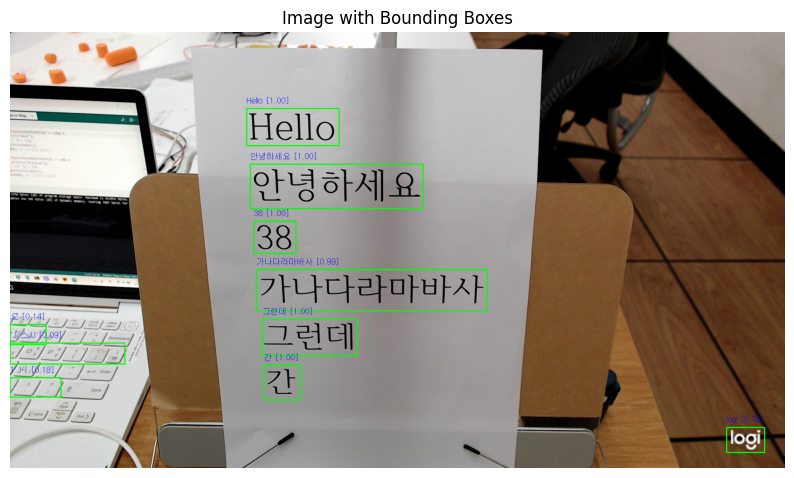

이미지 내 텍스트 라벨링을 완료했습니다.
텍스트 철자 및 문법 교정을 진행 중입니다...


Exception in thread Thread-60 (read_from_port):
Traceback (most recent call last):
  File "C:\Users\peter\anaconda3\envs\capstone\Lib\threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "C:\Users\peter\anaconda3\envs\capstone\Lib\threading.py", line 1010, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\peter\AppData\Local\Temp\ipykernel_7776\4134011612.py", line 78, in read_from_port
  File "C:\Users\peter\capstone\braille_translate.py", line 155, in text_to_braille
    jungsung_char = jamo_chars[1]  # 중성
                    ~~~~~~~~~~^^^
IndexError: string index out of range


철자 및 문법 교정을 완료했습니다.
인식된 텍스트 :  ['Hello', '38', 'J Z', "' J ja", '1', 'J', 'log']
< 4 - 텍스트 점자로 변환 >
텍스트를 점자로 변환 중입니다...


In [16]:
from flask import Flask
import serial
import time
import os
import cv2
import threading
import subprocess
import nbimporter
from camera_operation import taking_picture
from image_processing import crop_image
from text_processing import text_correction, text_detection
from braille_translate import text_to_braille

app = Flask(__name__)

# 연결할 시리얼 포트와 baudrate 설정
ser = serial.Serial('COM7', 9600)

# 변수 선언 및 초기화
camera = cv2.VideoCapture(2)
recognized_texts_global = []
current_text_index = 0
braille_texts = []

def read_from_port(ser):
    # 인식된 텍스트를 저장할 전역 변수
    global recognized_texts_global
    global current_text_index
    global braille_texts

    while True:
        reading = ser.readline().decode().strip()  # 끝의 줄바꿈 제거
        print("=============== Received from Arduino -> ", reading, "===============")
        if reading == "Take Picture":
            # 이미지 촬영
            print("< 이미지 촬영 >")
            img_path = taking_picture(camera)
            """
            # 이미지 자르기
            print("\n< 2 - 이미지 전처리 >")
            cropped_img_path, img_left, img_right = crop_image(img_path)
            if cropped_img_path is None:
                #print("\n이미지 처리 실패. 다시 시도해주세요.")
                #continue  # 다음 반복으로 넘어가서 다시 버튼 신호 대기
                print("book객체가 없으므로 이미지 내 텍스트 인식...")
                recognized_texts = text_detection(img_path)
                                            
            # 이미지 내 텍스트 인식
            print("\n< 3 - 이미지 내 텍스트 인식 >")
            
            # 빈 값이 아닌 경우, img_left와 img_right 이미지 내 텍스트 인식
            if img_left and img_right:
                print("왼쪽 페이지 내 텍스트 인식 중...")
                recognized_texts_left = text_detection(img_left)
                print("오른쪽 페이지 내 텍스트 인식 중...")
                recognized_texts_right = text_detection(img_right)
                recognized_texts = recognized_texts_left + recognized_texts_right
            
            # 빈 값인 경우, cropped_img_path 이미지 내 텍스트 인식
            else:
                print("문서 내 텍스트 인식 중...")
                recognized_texts = text_detection(cropped_img_path)
            """
            
            recognized_texts = text_detection(img_path)
            # 인식된 텍스트 처리
            words_list = [word for text in recognized_texts for word in text.split()]
            corrected_texts = text_correction(words_list)
            filtered_texts = [text for text in corrected_texts if text.strip()]
            
            print("인식된 텍스트 : ", filtered_texts)
           # recognized_texts_global = filtered_texts  # 새로운 텍스트로 업데이트
           # current_text_index = 0  # 새로운 텍스트 리스트로 업데이트되면 인덱스 초기화

            
            # 텍스트를 점자로 변환하여 저장
            print("< 4 - 텍스트 점자로 변환 >")
            braille_texts = text_to_braille(filtered_texts)
            print("점자 텍스트 : ", braille_texts)
            recognized_texts_global = braille_texts
            current_text_index = 0
        elif reading == "Next":
            next_text()
            
        elif reading == "Previous":
            previous_text()
            
def next_text():
    global current_text_index
    
    if len(recognized_texts_global) == 0:
        print("\n리스트가 비어있습니다.")
        
    elif current_text_index < len(recognized_texts_global) - 1:
        send_text_to_arduino(recognized_texts_global[current_text_index])
        current_text_index += 1
    else:
        print("\n리스트의 끝점입니다.")

def previous_text():
    global current_text_index
    
    if len(recognized_texts_global) == 0:
        print("\n리스트가 비어있습니다.")
        
    elif current_text_index > 0:
        send_text_to_arduino(recognized_texts_global[current_text_index])
        current_text_index -= 1
        
    else:
        print("\n리스트의 시작점입니다.")

def send_text_to_arduino(text):
    print("Sending to Arduino:", text)
    ser.write((text + "\n").encode())
    print("\n")

# 프로그램 종료 시 자원 해제
def release_resources():
    camera.release()
    ser.close()

@app.route('/')
def index():
    return "Serial Communication with Arduino"

thread = threading.Thread(target=read_from_port, args=(ser,))
thread.start()

if __name__ == '__main__':
    app.run(debug=False, host='0.0.0.0', port=5000)